In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
usted_esta_aqui = os.getcwd()

In [5]:
origen = os.path.join(usted_esta_aqui)

In [6]:
os.chdir(origen)

In [9]:
ruta = os.path.join('data', 'raw', 'DF.csv')

In [10]:
df = pd.read_csv(ruta)

In [11]:
df.head()

,TITULO,AÑO,DURACION (min),GENERO,DIRECCION,GUION,PROTAGONISTA,PAIS,NOTA,VOTOS
0,(500) días juntos,2009,96,Romance,Marc Webb,Marc Webb,Joseph Gordon-Levitt,Estados Unidos,6.9,62814
1,"...Y si no, nos enfadamos",1974,92,Comedia,Marcello Fondato,Marcello Fondato,Terence Hill,Italia,5.9,5238
2,10 razones para odiarte,1999,97,Comedia,Gil Junger,Gil Junger,Heath Ledger,Estados Unidos,5.9,21667
3,10.000 KM,2014,98,Romance,Carlos Marqués-Marcet,Carlos Marqués-Marcet,Natalia Tena,España,6.4,10015
4,100 metros,2016,108,Drama,Marcel Barrena,Marcel Barrena,Dani Rovira,España,6.6,8968


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TITULO          5040 non-null   object 
 1   AÑO             5040 non-null   int64  
 2   DURACION (min)  5040 non-null   int64  
 3   GENERO          5040 non-null   object 
 4   DIRECCION       5040 non-null   object 
 5   GUION           5040 non-null   object 
 6   PROTAGONISTA    5040 non-null   object 
 7   PAIS            5040 non-null   object 
 8   NOTA            5040 non-null   float64
 9   VOTOS           5040 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 393.9+ KB


In [5]:
df.describe()

,AÑO,DURACION (min),NOTA,VOTOS
count,5040.000000,5040.000000,5040.000000,5040.00000
mean,2003.621825,113.891865,6.561905,16216.44623
std,12.983795,19.369748,0.537402,26417.90461
min,1972.000000,90.000000,5.800000,1000.00000
25%,1995.000000,100.000000,6.100000,2129.00000
50%,2006.000000,110.000000,6.500000,5287.00000
75%,2014.000000,123.000000,6.900000,17101.50000
max,2023.000000,450.000000,9.000000,202065.00000


### VALORACIÓN SEGÚN SU FECHA DE ESTRENO

In [23]:
df['AÑO'].value_counts().head(10)

2014    183
2017    172
2019    172
2018    171
2016    167
2006    166
2013    165
2007    164
2015    164
2004    159
Name: AÑO, dtype: int64

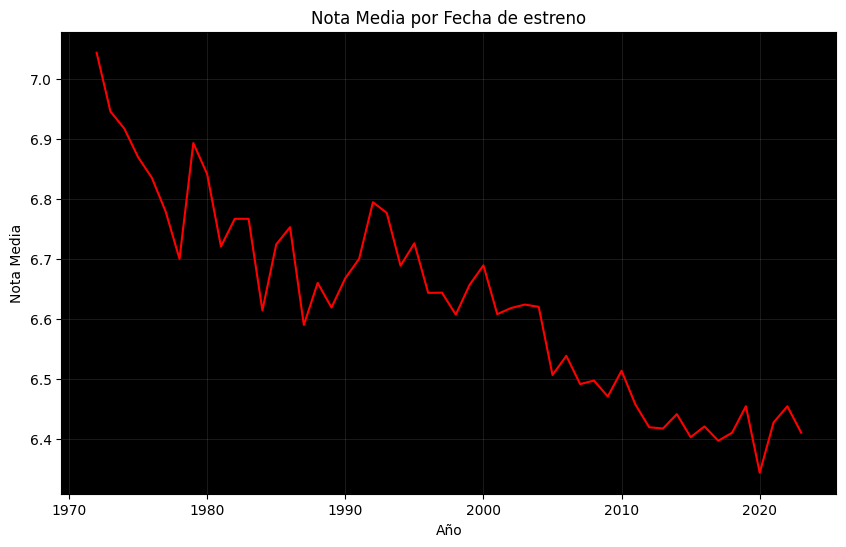

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('black')
mean_by_year = df.groupby('AÑO')['NOTA'].mean()
sns.lineplot(data=mean_by_year, x=mean_by_year.index, y=mean_by_year.values, color='red', ax=ax)
ax.set_xlabel('Año')
ax.set_ylabel('Nota Media')
ax.set_title('Nota Media por Fecha de estreno')
ax.grid(color='white', alpha=0.1)
ax.tick_params(axis='x')
plt.show()

- Teniendo en cuenta que hay más películas por año a partir del 2010 en la muestra seleccionada, y la caída en la gráfica; podemos afirmar que en la actualidad no es que se hagan peores películas, sino que los clásicos tienen valoraciones más altas.

### VALORACIÓN SEGÚN SU DURACIÓN

In [103]:
df.groupby('DURACION (min)')['NOTA'].mean().sort_values(ascending=False).head(15)

DURACION (min)
225    8.300
314    8.200
201    8.200
450    8.000
183    7.950
197    7.900
200    7.900
215    7.900
195    7.750
175    7.725
190    7.500
245    7.500
234    7.500
181    7.400
238    7.400
Name: NOTA, dtype: float64

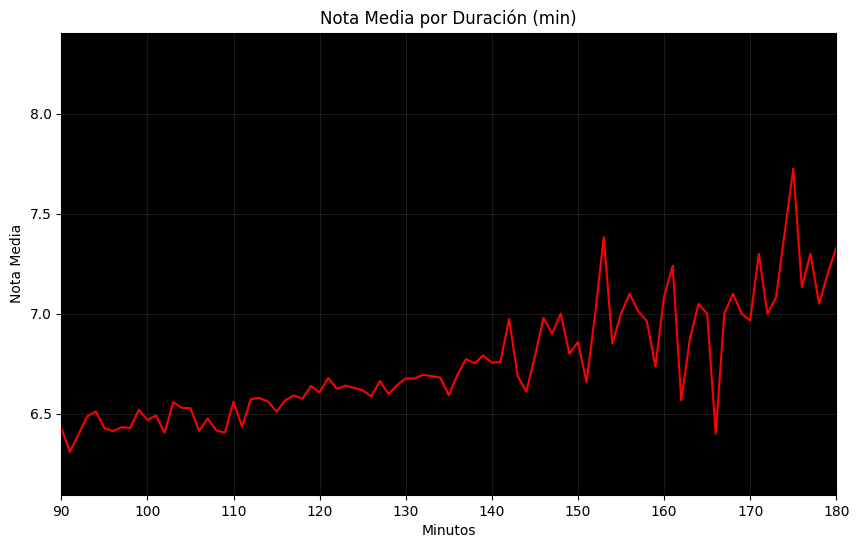

In [102]:
mean_by_mins = df.groupby('DURACION (min)')['NOTA'].mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('black')
sns.lineplot(data=mean_by_mins, x=mean_by_mins.index, y=mean_by_mins.values, color='red', ax=ax)
ax.set_xlim(90,180)
ax.set_xlabel('Minutos')
ax.set_ylabel('Nota Media')
ax.set_title('Nota Media por Duración (min)')
ax.grid(color='white', alpha=0.1)
ax.tick_params(axis='x')
plt.show()

- Podemos observar en la gráfica que normalmente las películas reciben mejor valoración cuanto más largas son. Se podría afirmar que la duración perfecta para los usuarios es de 2 horas y 55 minutos.

### VALORACIÓN SEGÚN SU GÉNERO

In [36]:
conteo_genero = df['GENERO'].value_counts()

In [39]:
escala_genero = conteo_genero / conteo_genero.max()

In [41]:
media_genero = df.groupby('GENERO')['NOTA'].mean()

In [43]:
valor_genero = escala_genero * media_genero

In [47]:
valor_genero = valor_genero.sort_values(ascending=False).head(10)

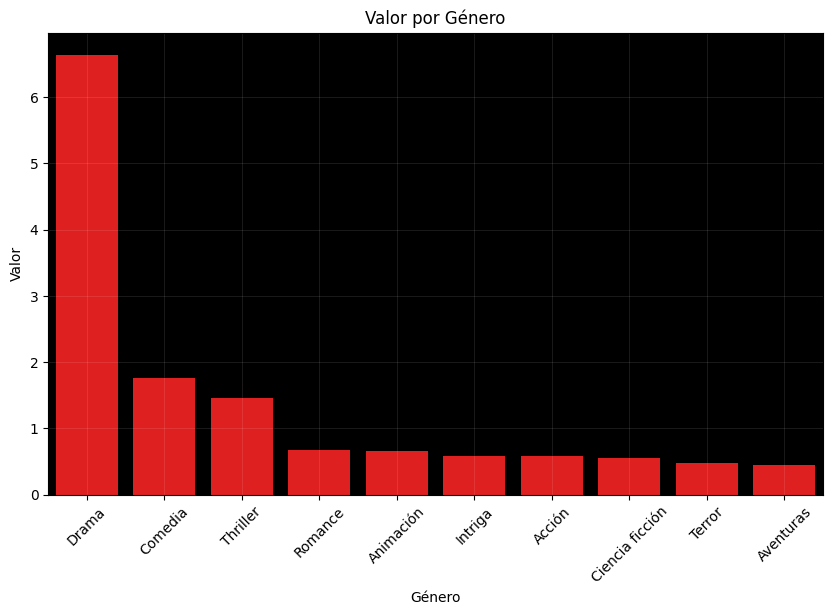

In [87]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('black')
sns.barplot(x=valor_genero.index, y=valor_genero.values, color='red', ax=ax)
ax.set_xlabel('Género')
ax.set_ylabel('Valor')
ax.set_title('Valor por Género')
ax.grid(color='white', alpha=0.1)
plt.xticks(rotation=45)
plt.show()

- Podemos observar que el género con mayor relevancia es el Drama. Este dato se ha obtenido agrupando el número de películas que hay en la muestra por género, y posteriormente clasificándolos según su nota media.

### VALORACIÓN SEGÚN DIRECCIÓN

In [52]:
conteo_direccion = df['DIRECCION'].value_counts()

In [54]:
escala_direccion = conteo_direccion / conteo_direccion.max()

In [55]:
media_direccion = df.groupby('DIRECCION')['NOTA'].mean()

In [56]:
valor_direccion = escala_direccion * media_direccion

In [57]:
valor_direccion = valor_direccion.sort_values(ascending=False).head(10)

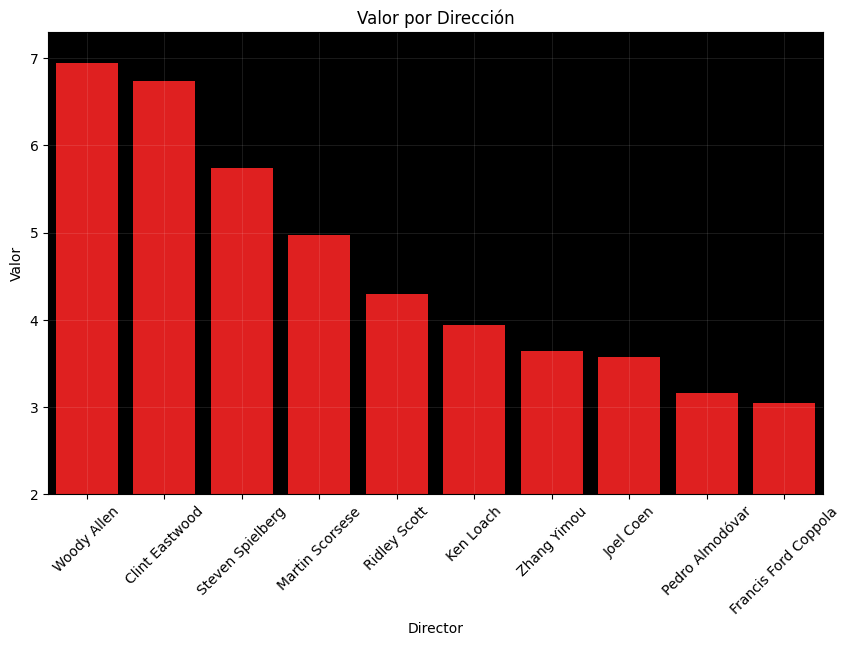

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('black')
sns.barplot(x=valor_direccion.index, y=valor_direccion.values, color='red', ax=ax)
ax.set_ylim(2)
ax.set_xlabel('Director')
ax.set_ylabel('Valor')
ax.set_title('Valor por Dirección')
ax.grid(color='white', alpha=0.1)
plt.xticks(rotation=45)
plt.show()

- Podemos observar que el director con mayor relevancia es Woody Allen. Este dato se ha obtenido agrupando el número de películas que hay en la muestra por dirección, y posteriormente clasificándolos según su nota media.

### VALORACIÓN SEGÚN PROTAGONISTA

In [64]:
conteo_prota = df['PROTAGONISTA'].value_counts()

In [67]:
escala_prota = conteo_prota / 28

In [69]:
media_prota = df.groupby('PROTAGONISTA')['NOTA'].mean()

In [70]:
valor_prota = escala_prota * media_prota

In [74]:
valor_prota = valor_prota.sort_values(ascending=False).iloc[1:11]

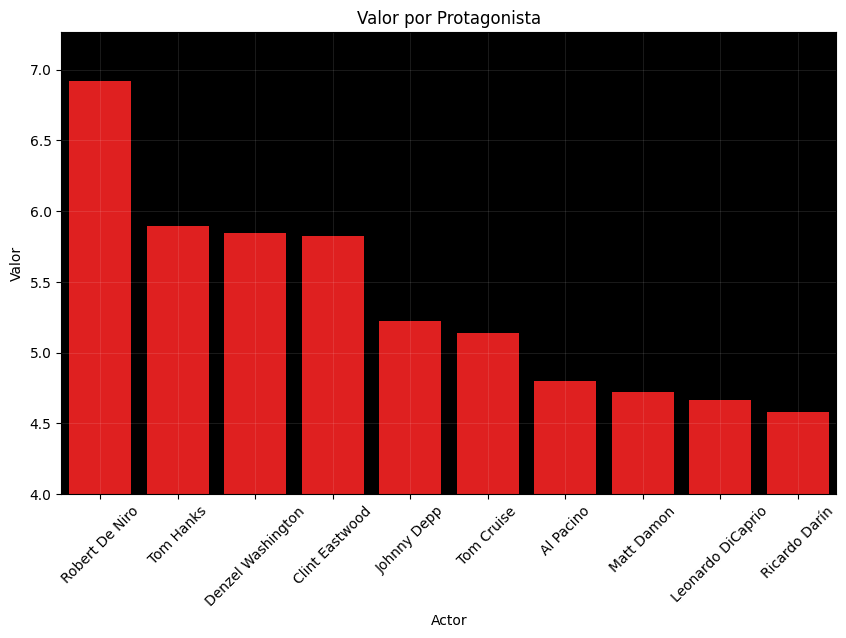

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('black')
sns.barplot(x=valor_prota.index, y=valor_prota.values, color='red', ax=ax)
ax.set_ylim(4)
ax.set_xlabel('Actor')
ax.set_ylabel('Valor')
ax.set_title('Valor por Protagonista')
ax.grid(color='white', alpha=0.1)
plt.xticks(rotation=45)
plt.show()

- Podemos observar que el actor con mayor relevancia es Robert De Niro. Este dato se ha obtenido agrupando el número de películas que hay en la muestra por protagonista, y posteriormente clasificándolos según su nota media.

### VALORACIÓN SEGÚN PAÍS

In [77]:
conteo_pais = df['PAIS'].value_counts()

In [79]:
escala_pais = conteo_pais / conteo_pais.max()

In [80]:
media_pais = df.groupby('PAIS')['NOTA'].mean()

In [81]:
valor_pais = escala_pais * media_pais

In [82]:
valor_pais = valor_pais.sort_values(ascending=False).head(10)

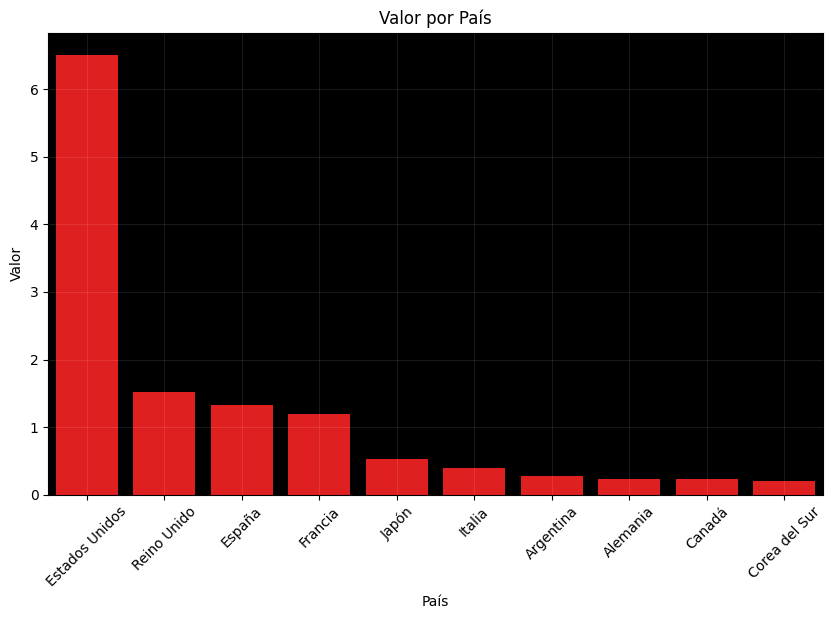

In [84]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('black')
sns.barplot(x=valor_pais.index, y=valor_pais.values, color='red', ax=ax)
# ax.set_ylim(6)
ax.set_xlabel('País')
ax.set_ylabel('Valor')
ax.set_title('Valor por País')
ax.grid(color='white', alpha=0.1)
plt.xticks(rotation=45)
plt.show()

- Podemos observar que el país con mayor relevancia es Estados Unidos. Este dato se ha obtenido agrupando el número de películas que hay en la muestra por país, y posteriormente clasificándolos según su nota media.

### VALORACIÓN SEGÚN VOTOS

In [89]:
df['RANGO_VOTOS'] = pd.cut(df['VOTOS'], bins=10, precision=2)

In [91]:
df['VM_RANGO_VOTOS'] = df.groupby('RANGO_VOTOS')['VOTOS'].transform('mean').astype(int)

In [94]:
mean_by_votes = df.groupby('VM_RANGO_VOTOS')['NOTA'].mean()

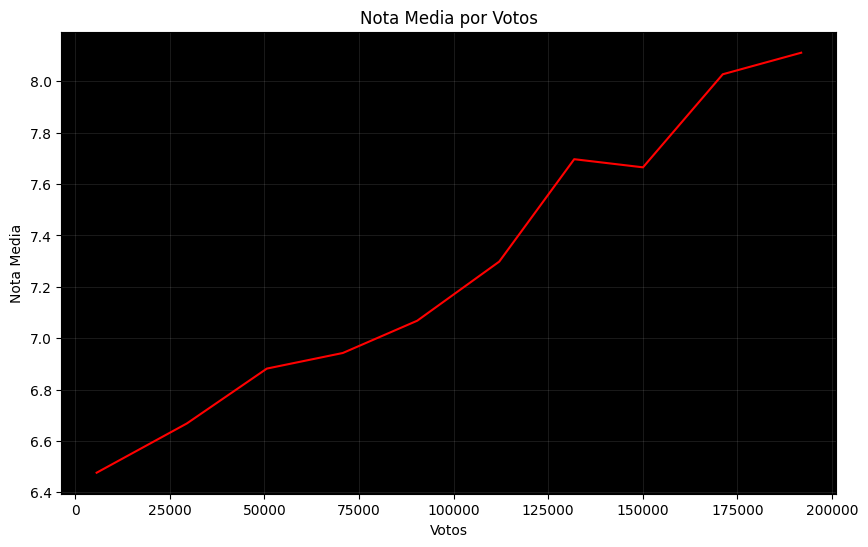

In [97]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('black')
sns.lineplot(x=mean_by_votes.index, y=mean_by_votes.values, color='red', ax=ax)
ax.set_xlabel('Votos')
ax.set_ylabel('Nota Media')
ax.set_title('Nota Media por Votos')
ax.grid(color='white', alpha=0.1)
ax.tick_params(axis='x')
plt.show()

- Podemos apreciar que según aumenta el número de votos, las películas obtienen una nota media mayor. Esto se puede interpretar como que los usuarios puntúan las películas cuanto más les han gustado.